# TD7: Searching for steady states

The goal of this TD is to get familiar with a few techniques that allow you to find the steady states of a dynamical system from a numerical point of view.

We will be interested in the following differential equation:
$$
    \dot{x} = -x^3 + 5x + \mu,
$$
that depends on a real parameter $\mu$. Here, the steady states are simply the roots of the polynomial $f_\mu(x) = -x^3 + 5x + \mu$. Depending on the value of $\mu$, there can be one, two or three real roots.

We will need the usual Python packages:

In [65]:
# To draw matplotlib plots within this notebook.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg

## Part 1: Runge-Kutta approach: an uncomplete bifurcation diagram

A first approach to find the steady states of a dynamical system is to draw some various initial conditions and integrate the corresponding Cauchy problems for a sufficient long time. This time has to be long enough to reach a steady state, at least approximately.

*Note that in general, a solution of a dynamical system is not guaranteed to converge, but for our particular system any solution will converge to a steady state (can you see why?).*

We thus want to solve multiple Cauchy problems such as:
$$
\begin{cases}
    \dot{x} &= f_\mu (x)\\
    x (0) &= x_0
\end{cases}
$$
with $x_0$ chosen from a set of relevant values $\{x_0^{(1)}, ..., x_0^{(m)}\}$.

We will use a Runge-Kutta method to integrate these systems. We recall the RK4 method (Runge-Kutta method of fourth order) that computes the value of the numerical solution $x (t)$ as follows:
$$
\begin{align}
    X_1 &= \Delta t~f_\mu\left(x (t)\right)\\
    X_2 &= \Delta t~f_\mu\left(x(t) + \frac{X_1}{2}\right)\\
    X_3 &= \Delta t~f_\mu\left(x(t) + \frac{X_2}{2}\right)\\
    X_4 &= \Delta t~f_\mu\left(x(t) + X_3\right)\\
    x (t + \Delta t) &= x (t) + \frac1{6}(X_1 + 2X_2 + 2X_3 + X_4)
\end{align}
$$

For a given initial condition $x_0$, we will solve the Cauchy problem on $[0, T]$, with $T$ big enough to claim that the numerical solution has approximately converged. In practice, we can use the following criterion to define $T$: let $T$ be the smallest positive number such as $|f_\mu(x(T))| \leq \sigma$, with $\sigma$ an arbitrary threshold .

**1)** Define a $rk4$ function which returns the value of $x(t+\Delta t)$ in function of $x(t)$, $f$, and $\Delta t$ using the previous Runge-Kutta method.

In [2]:
def rk4(xt, f, dt):
    X1 = dt * f(xt)
    X2 = dt * f(xt + X1/2)
    X3 = dt * f(xt + X2/2)
    X4 = dt * f(xt + X3)
    return xt + 1/6 * (X1 + 2 * X2 + 2 * X3 + X4)


**2)** For given values of $\mu$, $x_0$ and $\sigma$, integrate the system on $[0,T]$. We will plot the corresponding solution. Give an approximate value of the steady state $x_\infty$ reached by this solution.

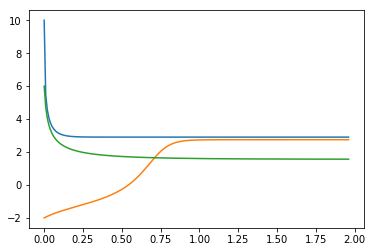

x_infty = [2.90547401 2.74734654 1.56582677]


In [11]:
def build_f(mu):
    return (lambda x : - x**3 + 5*x + mu)

def integrate(x0, mu, sigma, dt, plot = False):
    f = build_f(mu)
    x = x0
    xtab = [x0]
    ttab = [0]
    t = 0
    while np.dot(f(x), f(x)) > sigma**2:
        x = rk4(x, f, dt)
        t += dt
        xtab.append(x)
        ttab.append(t)
    if plot:
        plt.plot(ttab, xtab)
        plt.show()
    return ttab, xtab

ttab, xtab = integrate(np.array([10, -2, 6]), np.array([10, 7, -4]), 1e-2, 1e-2, plot = True)
print('x_infty = {}'.format(xtab[-1]))


Now that we know how to integrate our system and to approximate its steady states, we want to describe the dependence of the steady states to the $\mu$ parameter. We want to build a **bifurcation diagram**, which represents the steady states $x_\infty$ as a function of $\mu$ (there can be several steady states for a given value of $\mu$ as mentioned above).

**3)** Plot the bifurcation diagram of this dynamical system. We can typically probe values of $\mu$ that range from $-10$ to $10$, and for each of these values, probe values of $x_0$ that range from $-5$ to $5$.

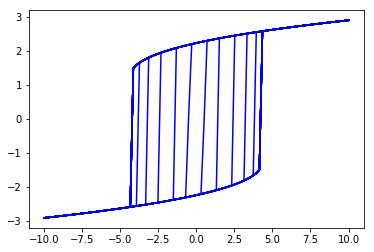

In [40]:
steadystates = []
for x0 in np.linspace(-5, 5, 50):
    xinftytab = []
    mutab =  np.linspace(-10, 10, 100)
    for mu in mutab:
        ttab, xtab = integrate(x0, mu, 1e-2, 1e-2, plot = False)
        xinfty = xtab[-1]
        xinftytab.append(xinfty)
    plt.plot(mutab, xinftytab, color = 'blue')

plt.show()

**4)** Can we find all the steady states of our system for a given value of $\mu$ with this method?

## Part 2: Newton's method: a complete bifurcation diagram

We need another technique if we want to find the unstable steady states. **Newton's method** is a general technique that find the zeros of a function independently of how stable these zeros are in the context of a dynamical system.

For a function $f$ defined over the real numbers, starting from a real $x_0$, Newton's method converges towards a zero of $f$ through the following recurrent sequence:
$$
    x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}
$$
Obviously the choice of $x_0$ will be determinant to the limit value of the previous sequence. We will need to try several initial conditions to find every zero of $f$.

**5)** Build a *newton* routine that computes the value of $x_{n+1}$ as a function of $f$, $f^\prime$ and $x_n$.

In [16]:
def newton(x, f, fp):
    return x - f(x)/fp(x)

**6)** Observe Newton's method quadratic convergence to a zero of $f_\mu$ polynomial printing $\left(f_\mu\left(x_n\right)\right)_n$ first terms for given values of $x_0$ and $\mu$. Do we always have a quadratic convergence of this method?

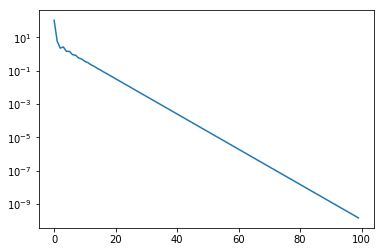

In [28]:
x0 = 10
mu = 5

ftab = []
ntab = np.arange(100)
f = build_f(mu)
x = x0

for n in ntab:
    x = newton(x, f, lambda x : - 2 * x**2 + 5)
    ftab.append(np.abs(f(x)))
    
plt.semilogy(ntab, ftab)
plt.show()

**7)** Plot a new bifurcation diagram of our dynamical system using Newton's method. Does it seem complete now?

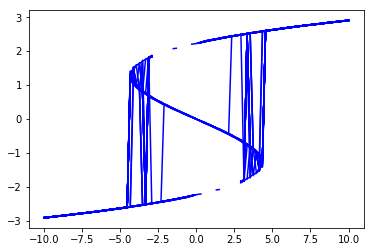

In [39]:
def integrate_newton(x0, mu, sigma):
    f = build_f(mu)
    x = x0
    t = 0
    xtab = [x0]
    ttab = [0]
    max_iter = 1000
    
    while np.dot(f(x), f(x)) > sigma**2 and t < max_iter:
        x = newton(x, f, lambda x : - 2 * x**2 + 5)
        t += 1
        xtab.append(x)
        ttab.append(t)
    return ttab, xtab, t < max_iter

steadystates = []
for x0 in np.linspace(-5, 5, 50):
    xinftytab = []
    mutab =  np.linspace(-10, 10, 100)
    for mu in mutab:
        ttab, xtab, convg = integrate_newton(x0, mu, 1e-1)
        if convg:
            xinfty = xtab[-1]
            xinftytab.append(xinfty)
        else:
            xinftytab.append(np.nan)
    plt.plot(mutab, xinftytab, color = 'blue')
        
plt.show()


## Bonus part: The Newton fractal

The [Newton fractal](https://en.wikipedia.org/wiki/Newton_fractal) is a fractal figure which stems from the application of Newton's method to the following complex polynomial:
$$
    f(z) = z^3 - 1
$$
The roots of the previous polynomial are well known, these are the third roots of unity: $\{1, e^{\frac{2i\pi}{3}}, e^{-\frac{2i\pi}{3}}\}$. Still, it is interesting to approximate these roots with a Newton's method applied to a regulard grid of initial values in the complex plane as spectacular properties of convergence come out from Newton's algorithm.

In the following, we will identify $\mathbb{C}$ to $\mathbb{R}^2$ for pedagogical purposes. Therefore Newton's method is to be applied to a function $f:\mathbb{R}^2\rightarrow\mathbb{R}^2$ defined as follows:
$$
    f (x, y) = \left( \begin{array}{c} f_1 (x,y) \\ f_2 (x,y)\end{array}\right) = \left( \begin{array}{c} \Re\left(\left(x+iy\right)^3 - 1\right) \\ \Im\left(\left(x+iy\right)^3 - 1\right)\end{array}\right)
$$
where $\Re$ and $\Im$ respectively denotes the real and imaginary part of a given complex number.

For a vector-valued function such as above $f$ function, Newton's method can be written as follows:
$$
    X_{n+1} = X_n - \left[\text{D}f(X_n)\right]^{-1}f(X_n)
$$
where $X_n$ is a vector (of dimension 2 for above $f$ function) and $\text{D}f(X_n)$ is the Jacobian matrix of $f$ at $X_n$. We recall the general expression of the Jacobian matrix for a function $f:\mathbb{R}^m\rightarrow\mathbb{R}^m$:
$$
    \text{D}f(X) = \left(\frac{\partial f_i}{\partial x_j}(X)\right)_{i, j\in\{1,...,m\}}
$$

**8)** What are the analytical expressions of $f$ and $\text{D}f$?

**9)** Perform Newton's method on $f$ for a dense enough 2D grid of initial conditions and for a uniform number of Newton iterations. We will use [scipy.linalg.inv](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html) function to invert the Jacobian matrix.

We have that:
$$
f(x, y) = \begin{pmatrix} x^3 - 3 x y^2 - 1\\ 3 x^2 y - y^3 \end{pmatrix}
$$

And therefore:
$$
D f = \begin{pmatrix} 
3 x^2 - 3 y^2 & - 6 x y\\
6 x y & 3x^2 - 3 y^2
\end{pmatrix}
$$
Which inverse can be readily obtained:
$$
Df^{-1} = \frac{1}{9 x^4 + 21 x^2 y^2 + 6 y^4} Df^T
$$

In [66]:
def f(M):
    x, y = M
    return np.array([x**3 - 3 * x * y**2 - 1, 3 * x**2 * y - y**3])

def invDf(M):
    x, y = M
    prefactor = 1/(9 * x**4 + 21 * x**2 * y **2 + 6 * y**4)
    return prefactor * np.array([[3*x**2 - 3 * y **2,  6 * x * y], [-6 * x * y, 3 * x**2 - 3 * y**2]])


def newton_mat(x, f, invDf):
    return x - invDf(x) @ f(x)


**10)** Plot using [pcolor](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolor.html) function for each point of the previous grid of initial conditions the complex argument of the final term of the Newton sequence (we can use [numpy.angle](https://docs.scipy.org/doc/numpy/reference/generated/numpy.angle.html) function to do that). You should observe a fractal figure called the *Newton fractal*. Does Newton's method always converge in this case?

c:\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


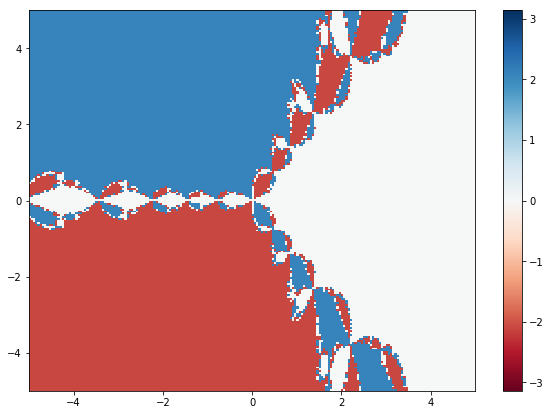

In [71]:
iters = np.arange(50)
dx, dy = 0.05, 0.05

y, x = np.mgrid[-5:5+dy:dy, -5:5+dx:dx]

z = np.zeros(y.shape)

for ix in range(x.shape[0]):
    for iy in range(y.shape[1]):
        cur_x, cur_y = x[ix, iy], y[ix, iy]
        M = np.array([cur_x, cur_y])
        for i in iters:
            M = newton_mat(M, f, invDf)
        z[ix, iy] = np.angle(M[0] + 1j * M[1])
        
plt.figure(figsize = (10, 7))
plt.pcolor(x, y, z, cmap='RdBu', vmin = -np.pi, vmax = np.pi)
plt.colorbar()
plt.show()